# **BIG SALES PREDICTION USING RANDOM FOREST REGRESSOR**



### **<u>UNDERSTANDING THE DATASET**

**There are 12 variables in dataset:**

1. Item_Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_Size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales

**Categorical Features:**


1.   Item_Identifier
2.   Item_Fat_Content
3.   Item_Type
4.   Outlet_Identifier
5.   Outlet_Size
6.   Outlet_Location_Type
7.   Outlet_Type


### **<u>IMPORTING THE DEPENDENCIES**





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### **<u>DATA COLLECTION & DATA PREPROCESSING**

In [4]:
#Loading the data from csv file to Pandas DataFrame
walmart_data = pd.read_csv('/content/Big Sales Data.csv')

In [5]:
#Getting the first 5 rows of the data frame
walmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [6]:
#Number of data points & number of features
walmart_data.shape

(14204, 12)

In [7]:
#Getting some information about the dataset
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
#Getting the column names
walmart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
#Getting the summary statistics
walmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [10]:
#Checking for missing values
walmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2389
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Handling the missing values
walmart_data['Item_Weight'].fillna(walmart_data.groupby(['Item_Type'])['Item_Weight'].transform('median'), inplace=True)

In [12]:
#Checking for missing values after handling them
walmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
#Removing outliers
from scipy import stats
walmart_data = walmart_data[np.abs(stats.zscore(walmart_data['Item_Outlet_Sales'])) < 2]

# Get Categories and Counts of Categorical Variables

In [14]:
#Counting the occurrences of each unique value in the 'Item_Fat_Content' column
walmart_data[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8173
Regular             4665
LF                   512
reg                  190
low fat              170
Name: count, dtype: int64

In [15]:
#Standardizing fat content labels in the 'Item_Fat_Content' column
walmart_data.replace({'Item_Fat_Content': {'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'}}, inplace=True)

In [16]:
#Counting the occurrences of each unique value in the 'Item_Fat_Content' column after replacing
walmart_data[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8855
Regular             4855
Name: count, dtype: int64

### **<u>DATA ANALYSIS</u> (EDA)**

In [17]:
#Displaying concise summary information about the DataFrame 'walmart_data', including column data types and non-null counts
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13710 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13710 non-null  object 
 1   Item_Weight                13710 non-null  float64
 2   Item_Fat_Content           13710 non-null  object 
 3   Item_Visibility            13710 non-null  float64
 4   Item_Type                  13710 non-null  object 
 5   Item_MRP                   13710 non-null  float64
 6   Outlet_Identifier          13710 non-null  object 
 7   Outlet_Establishment_Year  13710 non-null  int64  
 8   Outlet_Size                13710 non-null  object 
 9   Outlet_Location_Type       13710 non-null  object 
 10  Outlet_Type                13710 non-null  object 
 11  Item_Outlet_Sales          13710 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [18]:
#Generating descriptive statistics of numerical columns including count, mean, standard deviation, minimum, quartiles, and maximum values
walmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,13710.000000,13710.000000,13710.000000,13710.000000,13710.000000
mean,12.743401,0.066720,138.595763,1998.082057,1974.582733
std,4.299072,0.051669,61.337782,8.254119,1334.159703
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.195000,0.027707,92.643600,1987.000000,890.840400
50%,12.600000,0.054616,138.683800,1999.000000,1705.779600
75%,16.100000,0.095273,183.352900,2004.000000,2826.986800
max,30.000000,0.328391,266.888400,2009.000000,5835.189665


In [19]:
sns.set()

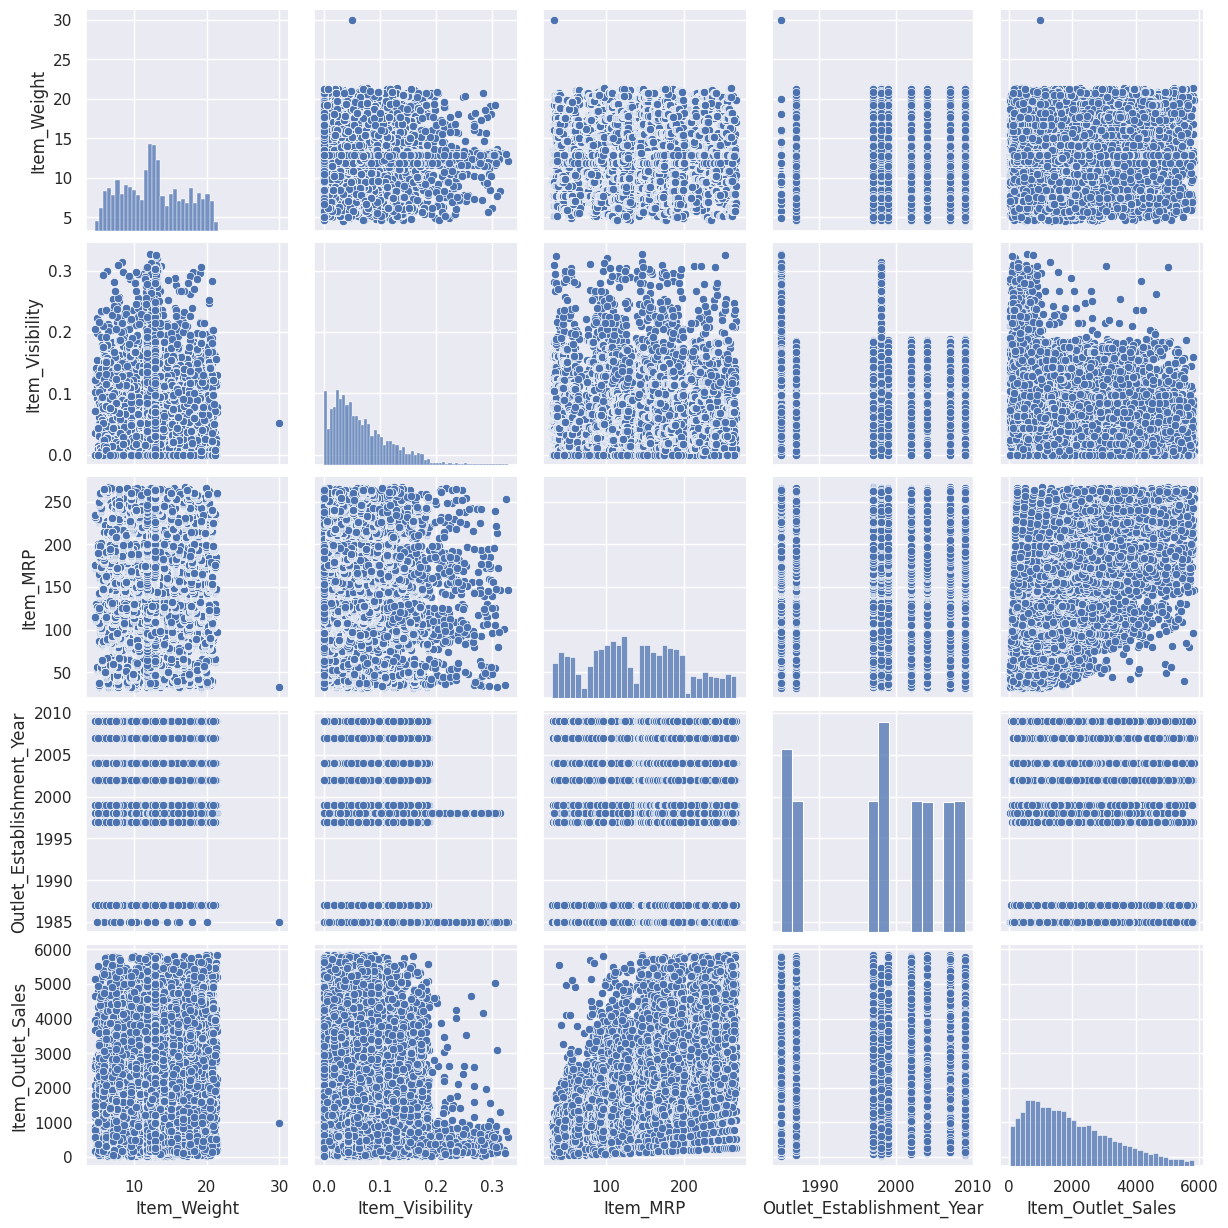

In [20]:
#Creating a pairplot to explore pairwise relationships between variables in the DataFrame 'walmart_data'
import seaborn as sns
sns.pairplot(walmart_data)

### (a) NUMERICAL FEATURES

<ipython-input-21-3544b7dc0477>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Item_Weight'])


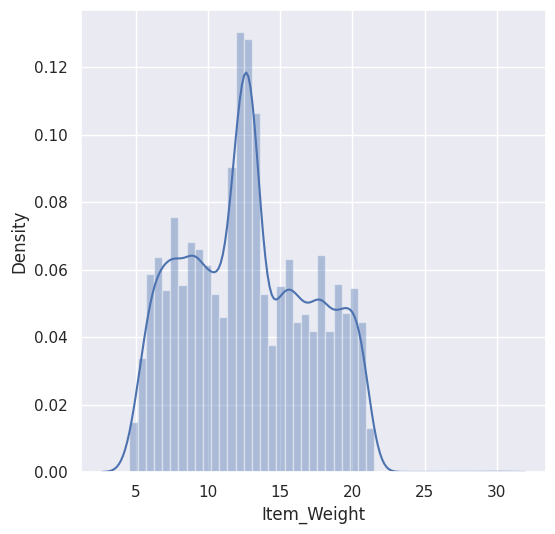

In [21]:
#Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(walmart_data['Item_Weight'])
plt.show()

<ipython-input-22-764eedeea9e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Item_Visibility'])


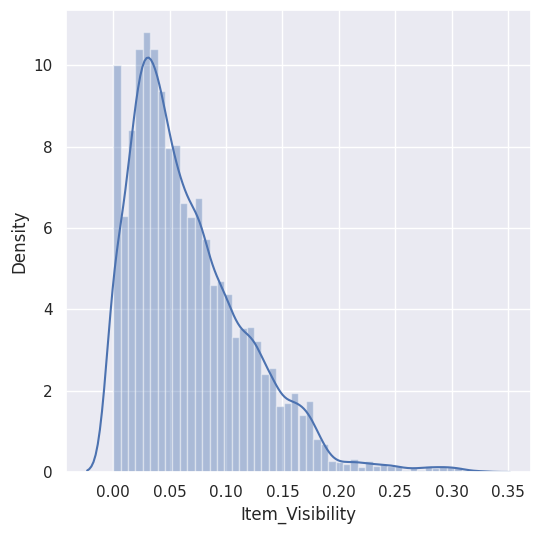

In [22]:
#Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(walmart_data['Item_Visibility'])
plt.show()

<ipython-input-23-e5d2ef1934e2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Item_MRP'])


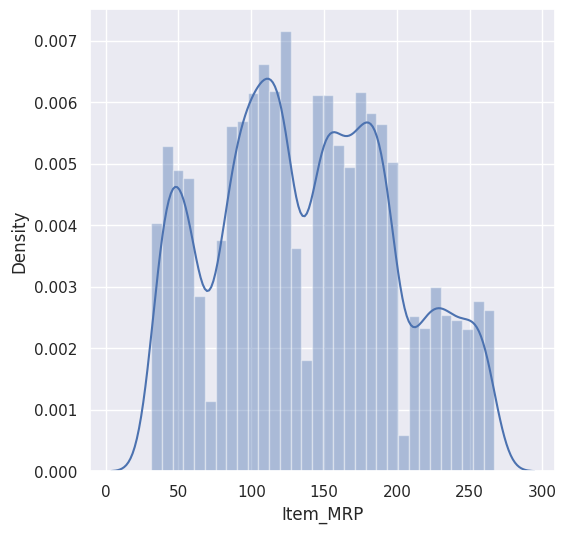

In [23]:
#Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(walmart_data['Item_MRP'])
plt.show()

<ipython-input-24-9343dc3228c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(walmart_data['Item_Outlet_Sales'])


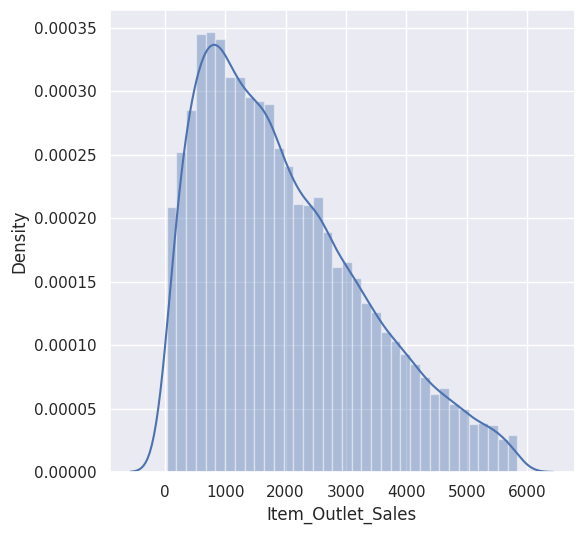

In [24]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(walmart_data['Item_Outlet_Sales'])
plt.show()

### (b) CATEGORICAL FEATURES


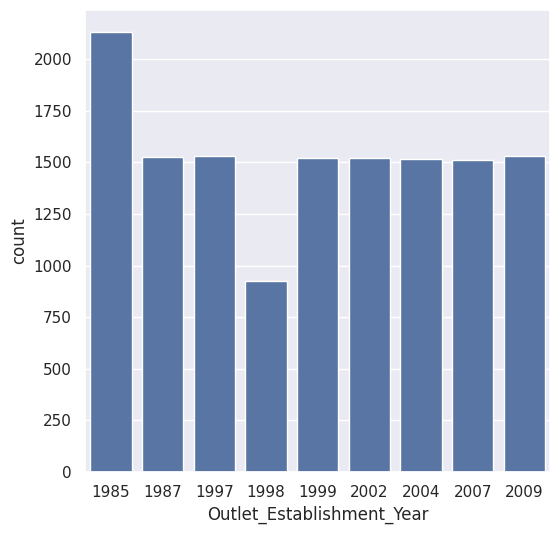

In [25]:
#Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=walmart_data)
plt.show()

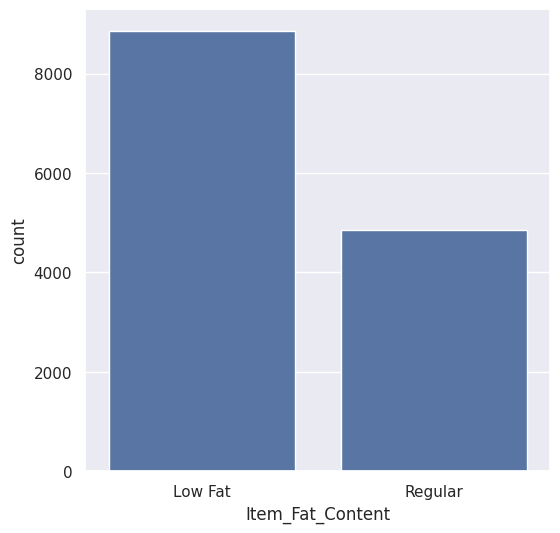

In [26]:
#Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=walmart_data)
plt.show()

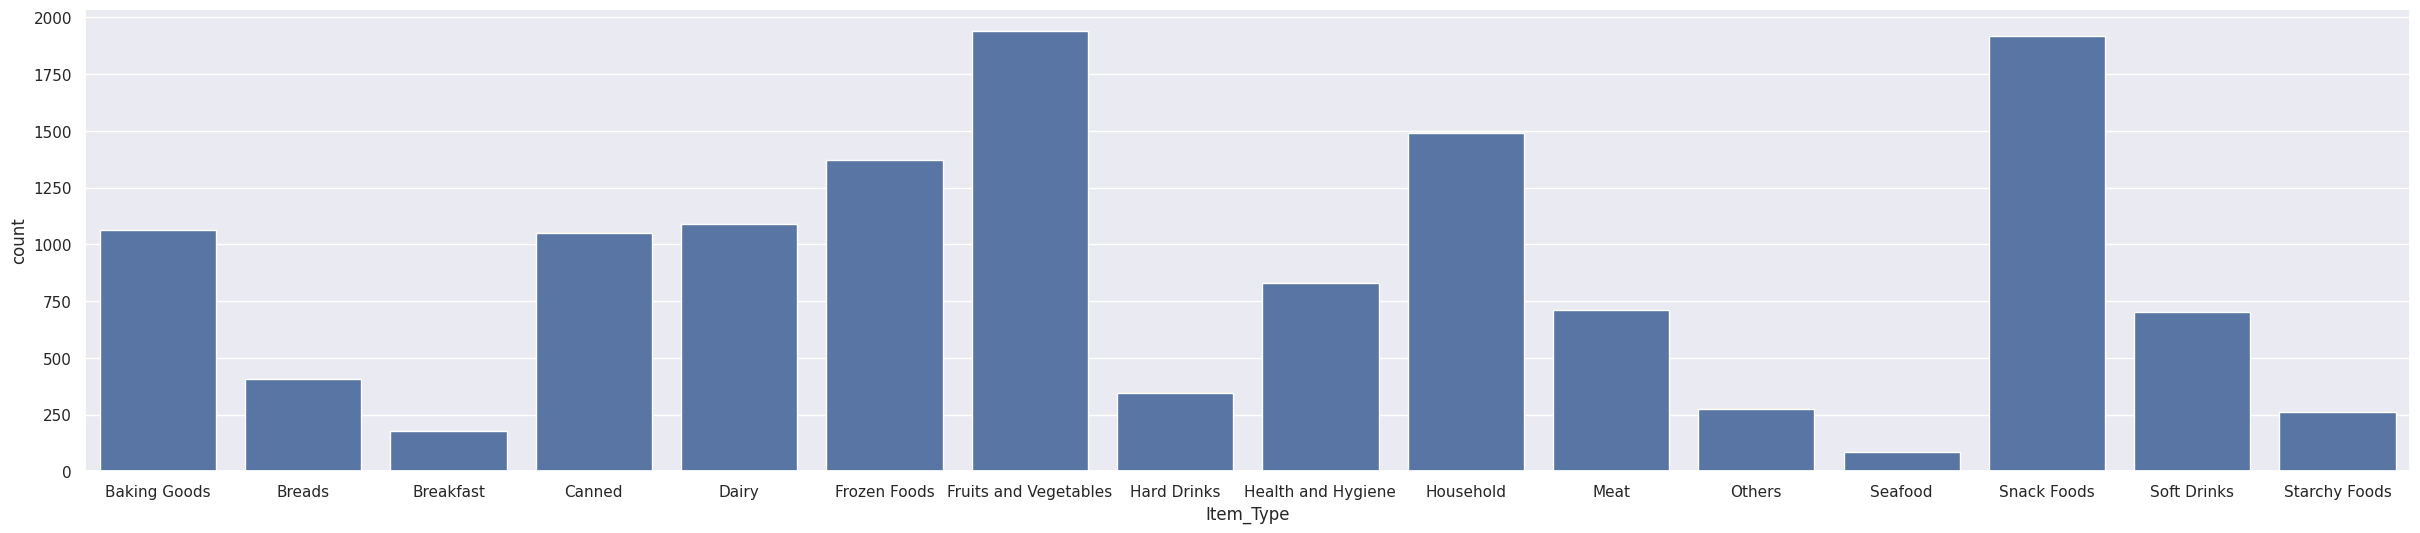

In [27]:
#Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=walmart_data)
plt.show()

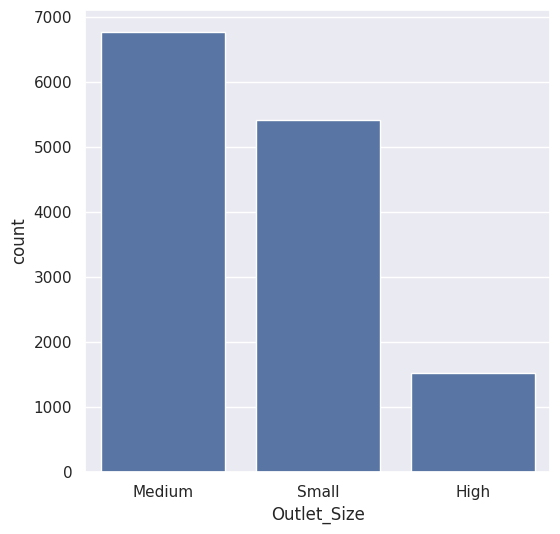

In [28]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=walmart_data)
plt.show()

### **<u>LABEL ENCODING**

In [29]:
#Initializing a LabelEncoder object named 'encoder' to encode categorical variables into numerical labels
encoder = LabelEncoder()

In [30]:
#Encoding categorical variables into numerical labels using the LabelEncoder object 'encoder' for respective columns in the DataFrame 'walmart_data'
walmart_data['Item_Identifier'] = encoder.fit_transform(walmart_data['Item_Identifier'])

walmart_data['Item_Fat_Content'] = encoder.fit_transform(walmart_data['Item_Fat_Content'])

walmart_data['Item_Type'] = encoder.fit_transform(walmart_data['Item_Type'])

walmart_data['Outlet_Identifier'] = encoder.fit_transform(walmart_data['Outlet_Identifier'])

walmart_data['Outlet_Size'] = encoder.fit_transform(walmart_data['Outlet_Size'])

walmart_data['Outlet_Location_Type'] = encoder.fit_transform(walmart_data['Outlet_Location_Type'])

walmart_data['Outlet_Type'] = encoder.fit_transform(walmart_data['Outlet_Type'])

- **Counting the occurrences of each unique value in each column after replacing categorical values with numerical equivalents**



In [31]:
#Counting the occurrences of each unique value in the 'Item_Identifier'
walmart_data[['Item_Identifier']].value_counts()

Item_Identifier
779                10
316                10
314                10
313                10
1195               10
                   ..
236                 5
1210                5
1385                5
933                 5
156                 3
Name: count, Length: 1559, dtype: int64

In [32]:
#Counting the occurrences of each unique value in the 'Item_Fat_Content'
walmart_data[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   8855
1                   4855
Name: count, dtype: int64

In [34]:
#Counting the occurrences of each unique value in the 'Item_Type'
walmart_data[['Item_Type']].value_counts()

Item_Type
6            1939
13           1917
9            1491
5            1372
4            1091
0            1062
3            1048
8             828
10            710
14            703
1             406
7             347
11            273
15            261
2             177
12             85
Name: count, dtype: int64

In [35]:
#Counting the occurrences of each unique value in the 'Outlet_Identifier'
walmart_data[['Outlet_Identifier']].value_counts()

Outlet_Identifier
3                    1529
8                    1529
1                    1525
7                    1523
9                    1520
6                    1517
2                    1511
5                    1284
0                     925
4                     847
Name: count, dtype: int64

In [36]:
#Counting the occurrences of each unique value in the 'Outlet_Size'
walmart_data[['Outlet_Size']].value_counts()

Outlet_Size
1              6768
2              5417
0              1525
Name: count, dtype: int64

In [37]:
#Counting the occurrences of each unique value in the 'Outlet_Location_Type'
walmart_data[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5263
1                       4551
0                       3896
Name: count, dtype: int64

In [38]:
#Counting the occurrences of each unique value in the 'Outlet_Type'
walmart_data[['Outlet_Type']].value_counts()

Outlet_Type
1              9125
0              1772
2              1529
3              1284
Name: count, dtype: int64

In [39]:
#Retrieving first five rows after label encoding
walmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,12.3,0,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,946,12.3,0,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,946,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,946,12.3,0,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,740,9.8,1,0.045523,0,35.0874,2,2007,1,1,1,352.874000


In [40]:
#Checking correlation
walmart_data.describe().corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.994744,0.994591,0.994585,0.994678,0.996026,0.994644,0.985696,0.994597,0.994599,0.994599,0.954941
Item_Weight,0.994744,1.000000,0.999999,0.999999,1.000000,0.999907,0.999999,0.986922,0.999999,0.999999,0.999999,0.922230
Item_Fat_Content,0.994591,0.999999,1.000000,1.000000,1.000000,0.999885,1.000000,0.986804,1.000000,1.000000,1.000000,0.921632
Item_Visibility,0.994585,0.999999,1.000000,1.000000,1.000000,0.999884,1.000000,0.986805,1.000000,1.000000,1.000000,0.921613
Item_Type,0.994678,1.000000,1.000000,1.000000,1.000000,0.999897,1.000000,0.986839,1.000000,1.000000,1.000000,0.921953
Item_MRP,0.996026,0.999907,0.999885,0.999884,0.999897,1.000000,0.999892,0.987665,0.999885,0.999886,0.999886,0.927151
Outlet_Identifier,0.994644,0.999999,1.000000,1.000000,1.000000,0.999892,1.000000,0.986826,1.000000,1.000000,1.000000,0.921816
Outlet_Establishment_Year,0.985696,0.986922,0.986804,0.986805,0.986839,0.987665,0.986826,1.000000,0.986811,0.986807,0.986810,0.921226
Outlet_Size,0.994597,0.999999,1.000000,1.000000,1.000000,0.999885,1.000000,0.986811,1.000000,1.000000,1.000000,0.921650
Outlet_Location_Type,0.994599,0.999999,1.000000,1.000000,1.000000,0.999886,1.000000,0.986807,1.000000,1.000000,1.000000,0.921657


### Defining y (dependent or label or target variable) and X (independent or features or attribute Variable)

In [41]:
#Extracting the target variable 'Item_Outlet_Sales' and assigning it to the variable 'y'
y = walmart_data['Item_Outlet_Sales']

In [42]:
# Extracting the features from the DataFrame 'walmart_data' and assigning them to the variable 'X'
X = walmart_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

### **<u>TRAIN-TEST SPLIT**

In [53]:
#Getting Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10968, 10), (2742, 10), (10968,), (2742,))

### **<u>MODEL TRAINING**

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor()

In [46]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

### **<U>MODEL PREDICTION**

In [47]:
y_pred = rfr.predict(X_test)

### **<U>MODEL EVALUATION**

**(A) Using MAE**

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
mean_absolute_error(y_test, y_pred)

694.5963006401037

**(B) Using R Squared Value**

In [50]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test, y_pred)

In [51]:
print('R Squared value = ', r2_test)

R Squared value =  0.50333595249748


### **<u>VISUALIZATION OF ACTUAL VS PREDICTED VALUES**

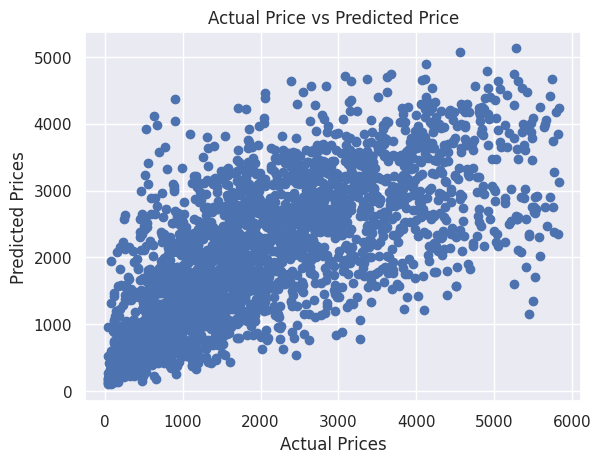

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

---------------